## Design and simulate a 1D photonic crystal (1DPC) optical filter using Python. 
This includes code for modelling the photonic bandgap, calculating reflectance, transmittance, and absoptance spectra, and customizing material and layer parameters for various optical applications.

# 1. Import required library

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tmm import coh_tmm, unpolarized_RT, inf

# 2. Reading material properties and parameters definition

In [14]:
def read_optical_data(filepath):
    data = pd.read_csv(filepath)
    data = data.apply(pd.to_numeric, errors='coerce')  # Ensure all data is numeric
    wavelength = data.iloc[:, 0] * 1e-6  # Convert microns to meters
    n = data.iloc[:, 1]
    k = data.iloc[:, 2]
    return wavelength, n, k

# Paths to the CSV files
# copy and paste data files location path.csv file
sio2_data_path = 'path.csv'
tio2_data_path = 'path.csv'

# Read data
sio2_wavelength, sio2_n, sio2_k = read_optical_data(sio2_data_path)
tio2_wavelength, tio2_n, tio2_k = read_optical_data(tio2_data_path)

# Define peak wavelength and calculate layer thicknesses
peak_wavelength = 1.8e-6  # Peak wavelength in meters

sio2_n_peak = np.interp(peak_wavelength, sio2_wavelength, sio2_n)
tio2_n_peak = np.interp(peak_wavelength, tio2_wavelength, tio2_n)
d_sio2 = peak_wavelength / (4 * sio2_n_peak)  # Quarter-wave thickness for SiO2
d_tio2 = peak_wavelength / (4 * tio2_n_peak)  # Quarter-wave thickness for TiO2


d_list = [inf, d_sio2 / 2, d_tio2] + [d_sio2, d_tio2] * 4  + [inf]
angles = np.arange(0, 10, 10)
wavelengths = np.linspace(0.36e-6, 10e-6, 9000)


NameError: name 'pd' is not defined

# 3. calculation and plot

In [16]:
# Collecting data
results = {angle: {'R': [], 'T': [], 'A': []} for angle in angles}

plt.figure(figsize=(15, 5))

for angle_deg in angles:
    angle_rad = np.radians(angle_deg)
    for wl in wavelengths:
        n_sio2 = np.interp(wl, sio2_wavelength, sio2_n) + 1j * np.interp(wl, sio2_wavelength, sio2_k)
        n_tio2 = np.interp(wl, tio2_wavelength, tio2_n) + 1j * np.interp(wl, tio2_wavelength, tio2_k)
        n_list = [1] + [n_sio2, n_tio2] + [n_sio2, n_tio2] * 4 + [1.4]

        res_s = coh_tmm('s', n_list, d_list, angle_rad, wl)
        res_p = coh_tmm('p', n_list, d_list, angle_rad, wl)

        R = (res_s['R'] + res_p['R']) / 2
        T = (res_s['T'] + res_p['T']) / 2
        A = 1 - R - T  # Absorption

        results[angle_deg]['R'].append(R)
        results[angle_deg]['T'].append(T)
        results[angle_deg]['A'].append(A)

    plt.plot(wavelengths * 1e6, results[angle_deg]['R'], label=f'Reflection {angle_deg}°')
    plt.plot(wavelengths * 1e6, results[angle_deg]['T'], label=f'Transmission {angle_deg}°')
    plt.plot(wavelengths * 1e6, results[angle_deg]['A'], label=f'Absorption {angle_deg}°')

plt.xlabel('Wavelength (μm)')
plt.ylabel('Fraction')
plt.title('Reflection, Transmission, and Absorption Spectra for S and P Polarizations')
plt.legend()
plt.grid(True)
plt.show()

# Create DataFrame for each property
transmission_df = pd.DataFrame({f'Transmission {angle}°': results[angle]['T'] for angle in angles}, index=wavelengths*1e6)
reflection_df = pd.DataFrame({f'Reflection {angle}°': results[angle]['R'] for angle in angles}, index=wavelengths*1e6)
absorption_df = pd.DataFrame({f'Absorption {angle}°': results[angle]['A'] for angle in angles}, index=wavelengths*1e6)

# Save to Excel with multiple sheets
with pd.ExcelWriter('/Users/mehra/Documents/tio2sio21DPC-2stack 18-22.xlsx') as writer:
    transmission_df.to_excel(writer, sheet_name='Transmission')
    reflection_df.to_excel(writer, sheet_name='Reflection')
    absorption_df.to_excel(writer, sheet_name='Absorption')


NameError: name 'angles' is not defined

# double stack

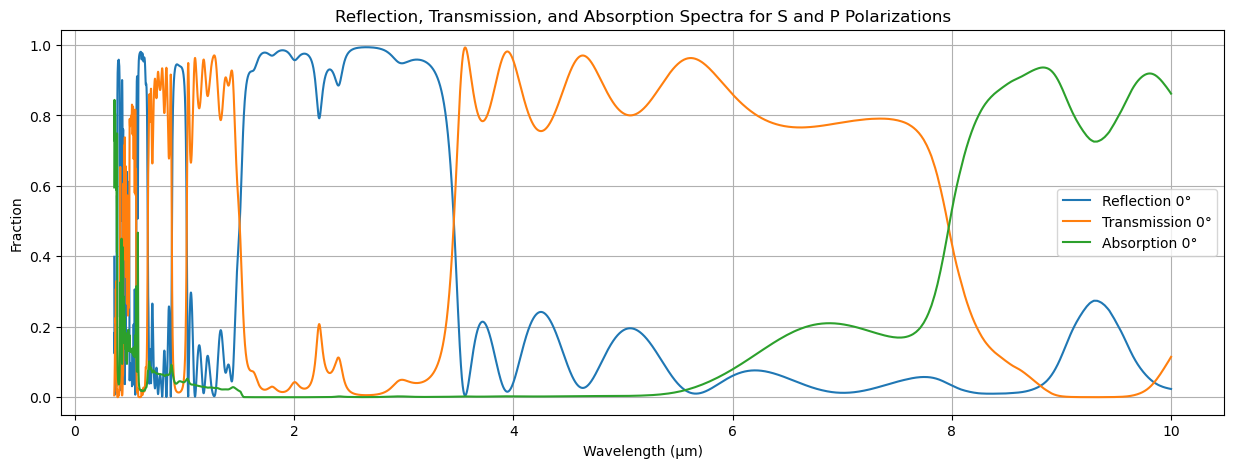

In [45]:
# Define peak wavelength and calculate layer thicknesses
peak_wavelength = 1.8e-6  # Peak wavelength in meters
peak2_wavelength = 2.8e-6  # Peak wavelength in meters

sio2_n_peak = np.interp(peak_wavelength, sio2_wavelength, sio2_n)
tio2_n_peak = np.interp(peak_wavelength, tio2_wavelength, tio2_n)
d_sio2 = peak_wavelength / (4 * sio2_n_peak)  # Quarter-wave thickness for SiO2
d_tio2 = peak_wavelength / (4 * tio2_n_peak)  # Quarter-wave thickness for TiO2
d2_sio2 = peak2_wavelength / (4 * sio2_n_peak)  # Quarter-wave thickness for SiO2
d2_tio2 = peak2_wavelength / (4 * tio2_n_peak)  # Quarter-wave thickness for TiO2

d_list = [inf, d_sio2 / 2, d_tio2] + [d_sio2, d_tio2] * 4 + [d2_sio2, d2_tio2] * 5 + [inf]
angles = np.arange(0, 10, 10)
wavelengths = np.linspace(0.36e-6, 10e-6, 9000)

# Collecting data
results = {angle: {'R': [], 'T': [], 'A': []} for angle in angles}

plt.figure(figsize=(15, 5))

for angle_deg in angles:
    angle_rad = np.radians(angle_deg)
    for wl in wavelengths:
        n_sio2 = np.interp(wl, sio2_wavelength, sio2_n) + 1j * np.interp(wl, sio2_wavelength, sio2_k)
        n_tio2 = np.interp(wl, tio2_wavelength, tio2_n) + 1j * np.interp(wl, tio2_wavelength, tio2_k)
        n_list = [1] + [n_sio2, n_tio2] + [n_sio2, n_tio2] * 9 + [1.4]

        res_s = coh_tmm('s', n_list, d_list, angle_rad, wl)
        res_p = coh_tmm('p', n_list, d_list, angle_rad, wl)

        R = (res_s['R'] + res_p['R']) / 2
        T = (res_s['T'] + res_p['T']) / 2
        A = 1 - R - T  # Absorption

        results[angle_deg]['R'].append(R)
        results[angle_deg]['T'].append(T)
        results[angle_deg]['A'].append(A)

    plt.plot(wavelengths * 1e6, results[angle_deg]['R'], label=f'Reflection {angle_deg}°')
    plt.plot(wavelengths * 1e6, results[angle_deg]['T'], label=f'Transmission {angle_deg}°')
    plt.plot(wavelengths * 1e6, results[angle_deg]['A'], label=f'Absorption {angle_deg}°')

plt.xlabel('Wavelength (μm)')
plt.ylabel('Fraction')
plt.title('Reflection, Transmission, and Absorption Spectra for S and P Polarizations')
plt.legend()
plt.grid(True)
plt.show()

# Create DataFrame for each property
transmission_df = pd.DataFrame({f'Transmission {angle}°': results[angle]['T'] for angle in angles}, index=wavelengths*1e6)
reflection_df = pd.DataFrame({f'Reflection {angle}°': results[angle]['R'] for angle in angles}, index=wavelengths*1e6)
absorption_df = pd.DataFrame({f'Absorption {angle}°': results[angle]['A'] for angle in angles}, index=wavelengths*1e6)

# Save to Excel with multiple sheets
with pd.ExcelWriter('/Users/mehra/Documents/tio2sio21DPC-2stack 18-30.xlsx') as writer:
    transmission_df.to_excel(writer, sheet_name='Transmission')
    reflection_df.to_excel(writer, sheet_name='Reflection')
    absorption_df.to_excel(writer, sheet_name='Absorption')


# triple stack

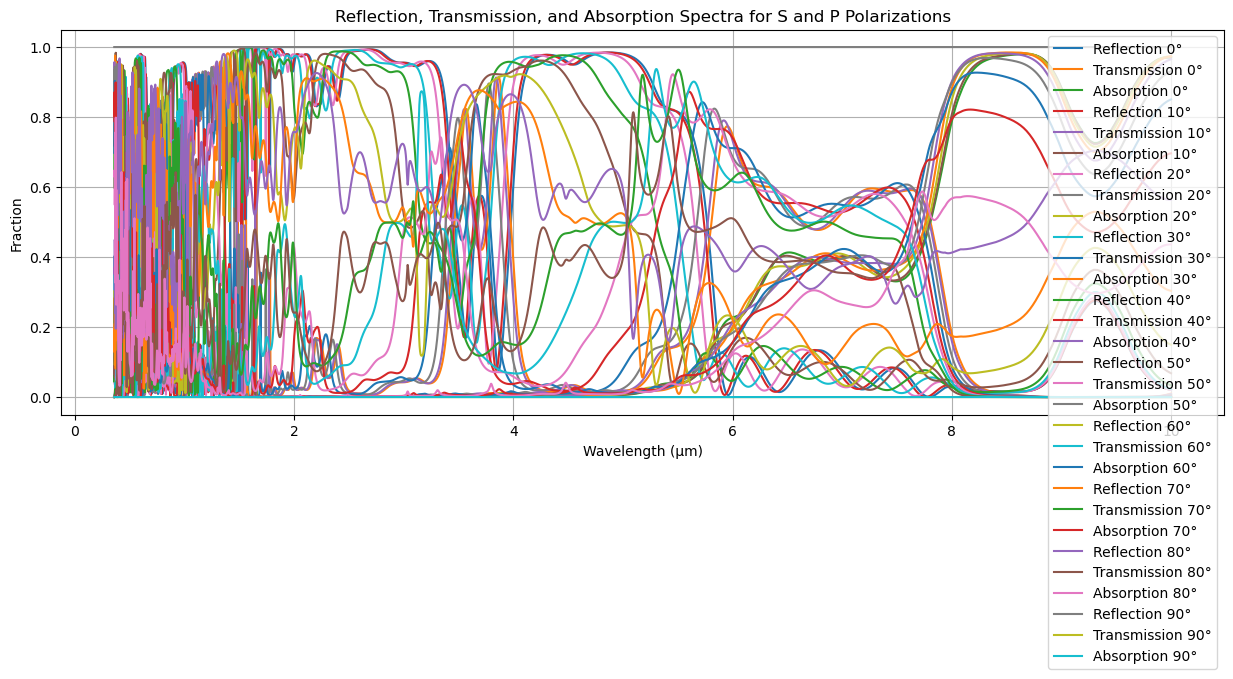

In [53]:
# Define peak wavelength and calculate layer thicknesses
peak_wavelength = 1.8e-6  # Peak wavelength in meters
peak2_wavelength = 2.8e-6  # Peak wavelength in meters
peak3_wavelength = 5e-6  # Peak wavelength in meters

sio2_n_peak = np.interp(peak_wavelength, sio2_wavelength, sio2_n)
tio2_n_peak = np.interp(peak_wavelength, tio2_wavelength, tio2_n)
d_sio2 = peak_wavelength / (4 * sio2_n_peak)  # Quarter-wave thickness for SiO2
d_tio2 = peak_wavelength / (4 * tio2_n_peak)  # Quarter-wave thickness for TiO2
d2_sio2 = peak2_wavelength / (4 * sio2_n_peak)  # Quarter-wave thickness for SiO2
d2_tio2 = peak2_wavelength / (4 * tio2_n_peak)  # Quarter-wave thickness for TiO2
d3_sio2 = peak3_wavelength / (4 * sio2_n_peak)  # Quarter-wave thickness for SiO2
d3_tio2 = peak3_wavelength / (4 * tio2_n_peak)  # Quarter-wave thickness for TiO2

d_list = [inf, d_sio2 / 2, d_tio2] + [d_sio2, d_tio2] * 4 + [d2_sio2, d2_tio2] * 5 + [d3_sio2, d3_tio2] * 5 + [inf]
angles = np.arange(0, 91, 10)
wavelengths = np.linspace(0.36e-6, 10e-6, 9000)

# Collecting data
results = {angle: {'R': [], 'T': [], 'A': []} for angle in angles}

plt.figure(figsize=(15, 5))

for angle_deg in angles:
    angle_rad = np.radians(angle_deg)
    for wl in wavelengths:
        n_sio2 = np.interp(wl, sio2_wavelength, sio2_n) + 1j * np.interp(wl, sio2_wavelength, sio2_k)
        n_tio2 = np.interp(wl, tio2_wavelength, tio2_n) + 1j * np.interp(wl, tio2_wavelength, tio2_k)
        n_list = [1] + [n_sio2, n_tio2] + [n_sio2, n_tio2] * 14 + [1.4]

        res_s = coh_tmm('s', n_list, d_list, angle_rad, wl)
        res_p = coh_tmm('p', n_list, d_list, angle_rad, wl)

        R = (res_s['R'] + res_p['R']) / 2
        T = (res_s['T'] + res_p['T']) / 2
        A = 1 - R - T  # Absorption

        results[angle_deg]['R'].append(R)
        results[angle_deg]['T'].append(T)
        results[angle_deg]['A'].append(A)

    plt.plot(wavelengths * 1e6, results[angle_deg]['R'], label=f'Reflection {angle_deg}°')
    plt.plot(wavelengths * 1e6, results[angle_deg]['T'], label=f'Transmission {angle_deg}°')
    plt.plot(wavelengths * 1e6, results[angle_deg]['A'], label=f'Absorption {angle_deg}°')

plt.xlabel('Wavelength (μm)')
plt.ylabel('Fraction')
plt.title('Reflection, Transmission, and Absorption Spectra for S and P Polarizations')
plt.legend()
plt.grid(True)
plt.show()

# Create DataFrame for each property
transmission_df = pd.DataFrame({f'Transmission {angle}°': results[angle]['T'] for angle in angles}, index=wavelengths*1e6)
reflection_df = pd.DataFrame({f'Reflection {angle}°': results[angle]['R'] for angle in angles}, index=wavelengths*1e6)
absorption_df = pd.DataFrame({f'Absorption {angle}°': results[angle]['A'] for angle in angles}, index=wavelengths*1e6)

# Save to Excel with multiple sheets
with pd.ExcelWriter('/Users/mehra/Documents/tio2sio21DPC-2stack 18-28-50.xlsx') as writer:
    transmission_df.to_excel(writer, sheet_name='Transmission')
    reflection_df.to_excel(writer, sheet_name='Reflection')
    absorption_df.to_excel(writer, sheet_name='Absorption')
